In [1]:
!pip install -r requirements.txt 

Installing seaborn...
seaborn installed successfully!
Installing scipy...
scipy installed successfully!
Installing scikit-learn...
scikit-learn installed successfully!
Installing scanpy...
scanpy installed successfully!
Installing biopython...
biopython installed successfully!
Installing dadapy...
dadapy installed successfully!
Installing requests...
requests installed successfully!


In [2]:
import sys 

sys.path.insert(1, 'My_libs/')

import IDmeter
import importlib
importlib.reload(IDmeter)

import Plot_figures
import importlib
importlib.reload(Plot_figures)

import Download_data
import importlib
importlib.reload(Download_data)

import collections
import numpy as np
import matplotlib.pyplot as plt

# Panel 3

In the following code we reproduce Figs. 3A, B, C of the main text of our article titled "The intrinsic dimension of gene expression during cell differentiation".

# Mouse pancreatic endocrinogenesis

The original dataset is available on GEO repository (GSE132188).

From the metadata they supply, we took the column named "clusters_fig2_final" and renamed it *cell-type* in *adata.obs*.

### Download data

In [3]:
dataset_name = "MousePancreas"
data_file_path = 'Data/'
data_file_name = 'DATA_FILE_NAME'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to PANCREAS EMBRYOGENESIS dataset!
Metadata in a dataframe with shape (36351, 16)
scRNA-seq data in a counts matrix with shape ((36351, 27998))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 1200 expressed genes were deleted (0)
 - cells with mitochondrial gene-expression fractions greater than 20.0% (0) were deleted

Genes selection...
Selecting 18734 protein-coding genes
Deleting genes because full of zeros

Normalization of the counts matrix...

scRNA-seq data in csr matrix with shape ((36351, 16558))
Metadata in a dataframe with columns ['cell', 'stage', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'celltype', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final']


### ID measure

In [4]:
celltypes_dict = dict(collections.Counter(df.celltype.values))
labels = celltypes = np.array(list(celltypes_dict.keys()))

celltypes_dict = dict(sorted(celltypes_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(celltypes_dict.values())[0]*0.75)

print("Number of cells per cell-type:", celltypes_dict)
print("From each cell-type we will sub-sample", n_subsampled_cells, "cells")

Number of cells per cell-type: {'Multipotent': 1225, 'Trunk': 1838, 'Fev+': 2058, 'Endocrine': 2999, 'EP': 5119, 'Tip': 6105, 'Ductal': 6575, 'Acinar': 10432}
From each cell-type we will sub-sample 918 cells


In [5]:
dataset_name = "MousePancreas"
labeling = "Celltype"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset MousePancreas
Celltype-based grouping of cells
Labels: ['Trunk' 'Tip' 'EP' 'Multipotent' 'Ductal' 'Fev+' 'Endocrine' 'Acinar']
3 independent sub-samplings
Counts matrix dimension=(36351, 16558)


Subsampling number 1 , with seed: 369635. Trunk ID = 47.2 - Tip ID = 37.2 - EP ID = 45.6 - Multipotent ID = 48.9 - Ductal ID = 46.1 - Fev+ ID = 38.7 - Endocrine ID = 17.4 - Acinar ID = 23.7 - 


Subsampling number 2 , with seed: 131277. Trunk ID = 47.7 - Tip ID = 38.2 - EP ID = 39.8 - Multipotent ID = 51.5 - Ductal ID = 44.7 - Fev+ ID = 42.9 - Endocrine ID = 17.4 - Acinar ID = 25.3 - 


Subsampling number 3 , with seed: 933718. Trunk ID = 47.1 - Tip ID = 37.7 - EP ID = 40.6 - Multipotent ID = 43.6 - Ductal ID = 46.3 - Fev+ ID = 42.5 - Endocrine ID = 17.8 - Acinar ID = 26.6 - 



### Plot

/home/niccolo/Desktop/Waddington ID/Codici/CodicePaper/My_libs/Plot_figures.py:98: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x_val, y, '-', color = plot_params['color'],
/home/niccolo/Desktop/Waddington ID/Codici/CodicePaper/My_libs/Plot_figures.py:98: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x_val, y, '-', color = plot_params['color'],
/home/niccolo/Desktop/Waddington ID/Codici/CodicePaper/My_libs/Plot_figures.py:98: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x_val, y, '-', color = plot_params['color'],


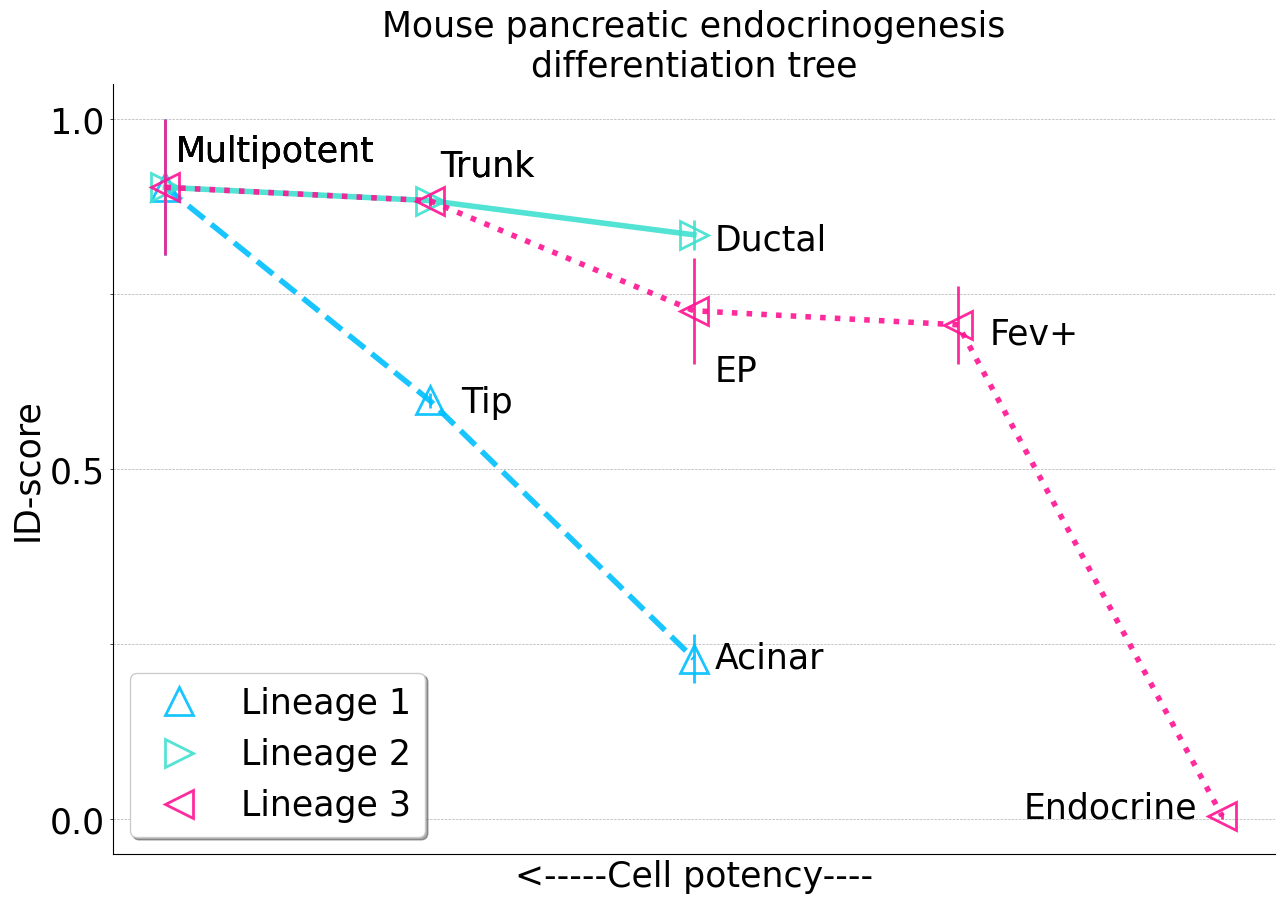

In [6]:
xlabel = f'Cell potency'

x = results_dict['Mean trend']['Labels']
y = results_dict['Mean trend']['Mean']
y_err = results_dict['Mean trend']['Std']
fig, ax = plt.subplots(figsize = (15, 10))
Plot_figures.tree_assembly(ax, x, y, y_err, dataset_name)

# Mouse erythropoiesis

The original dataset is available on E-MTAB repository (6967).

From the metadata they supply, we took the column named "celltype" and we stored it in *adata.obs*. For this study, we only took in consideration cells belonging to cell-types that are involved in the formation of erythroids, namely: Haematoendothelial progenitors, Blood progenitors 1, Blood progenitors 2, Erythroid1, Erythroid2, Erythroid3. 

### Download data

In [7]:
dataset_name = "MouseGastrulation"
data_file_path = 'Data/'
data_file_name = 'DATA_FILE_NAME'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to MOUSE GASTRULATION dataset!
Metadata in a dataframe with shape (139331, 29)
scRNA-seq data in a counts matrix with shape ((139331, 29452))
Dropping cells with nan values in metadata

Cleaning meta data...

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 1000 expressed genes were deleted. 0 deleted (0 full of zeros)
 - cells with mitochondrial gene-expression fractions greater than 2.37% were deleted. 18 deleted

Genes selection...
Selecting 19150 protein-coding genes
Deleting genes because full of zeros

Normalization of the counts matrix...

scRNA-seq data in csr martic with shape ((108839, 17502))
Metadata in a dataframe with columns ['cell', 'barcode', 'sam', 'stage', 'sequencing_batch', 'theiler', 'doub.density', 'cluster', 'cluster_sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajecto

### ID measure

In [8]:
labels = np.array(['Haematoendothelial progenitors', 'Blood progenitors 1', 
                   'Blood progenitors 2', 'Erythroid1', 'Erythroid2', 
                   'Erythroid3'])

In [9]:
selected_cts = np.array([ct for ct in df.celltype.values if ct in labels])
celltypes_dict = dict(collections.Counter(selected_cts))

celltypes_dict = dict(sorted(celltypes_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(celltypes_dict.values())[0]*0.75)

print("Number of cells per cell-type:", celltypes_dict)
print("From each cell-type we will sub-sample", n_subsampled_cells, "cells")

Number of cells per cell-type: {'Blood progenitors 1': 623, 'Erythroid2': 1106, 'Blood progenitors 2': 2459, 'Haematoendothelial progenitors': 2517, 'Erythroid3': 2697, 'Erythroid1': 2929}
From each cell-type we will sub-sample 467 cells


In [10]:
dataset_name = "MouseGastrulation"
labeling = "Celltype"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset MouseGastrulation
Celltype-based grouping of cells
Labels: ['Haematoendothelial progenitors' 'Blood progenitors 1'
 'Blood progenitors 2' 'Erythroid1' 'Erythroid2' 'Erythroid3']
3 independent sub-samplings
Counts matrix dimension=(108839, 17502)


Subsampling number 1 , with seed: 364624. Haematoendothelial progenitors ID = 38.7 - Blood progenitors 1 ID = 39.9 - Blood progenitors 2 ID = 37.6 - Erythroid1 ID = 35.7 - Erythroid2 ID = 25.6 - Erythroid3 ID = 15.6 - 


Subsampling number 2 , with seed: 222217. Haematoendothelial progenitors ID = 36.0 - Blood progenitors 1 ID = 41.3 - Blood progenitors 2 ID = 40.5 - Erythroid1 ID = 32.9 - Erythroid2 ID = 24.7 - Erythroid3 ID = 13.6 - 


Subsampling number 3 , with seed: 523031. Haematoendothelial progenitors ID = 36.2 - Blood progenitors 1 ID = 42.1 - Blood progenitors 2 ID = 42.2 - Erythroid1 ID = 33.3 - Erythroid2 ID = 26.1 - Erythroid3 ID = 14.1 - 



### Plot

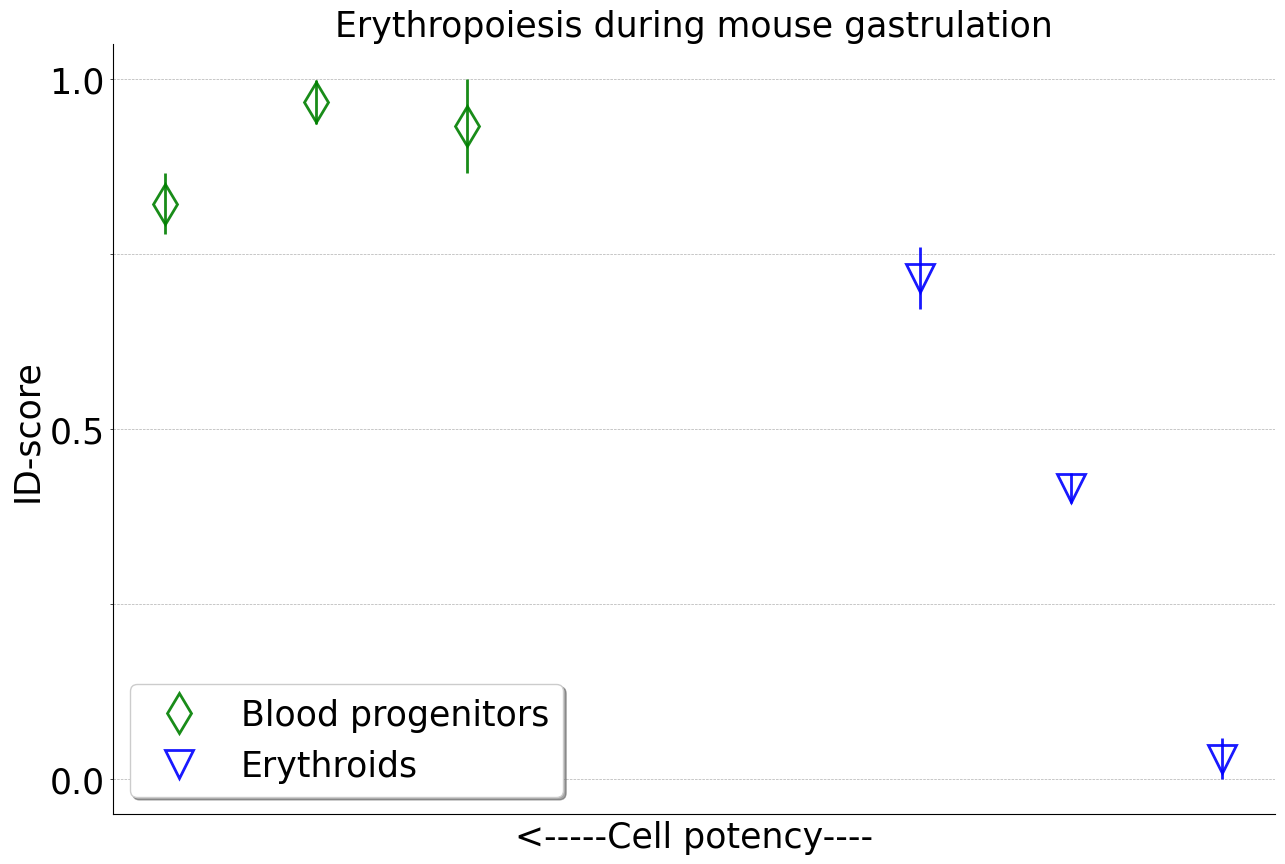

In [11]:
x = results_dict['Mean trend']['Labels']
y = results_dict['Mean trend']['Mean']
y_err = results_dict['Mean trend']['Std']

plot_params = {"label_size": 25, "markersize": 20,
                "linewidth": 4, "linestyle": ' ',
                "alpha": 0.9, "markeredgewidth": 2,
                "ticks_length": 2, "ticks_width": 0.5,
                "f_legend": 1}

fig, ax = plt.subplots(figsize = (15, 10))


title = 'Erythropoiesis during mouse gastrulation'
celltype_group1 = np.array(['Haematoendothelial progenitors', 
                    'Blood progenitors 1', 
                    'Blood progenitors 2'])
x_val = np.arange(1, len(celltype_group1)+1)
label = 'Blood progenitors'
plot_params['marker'] = 'd'
plot_params['color'] = 'green'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group1, dataset_name, 
                                title = title, plot_params = plot_params)

lineage_shift = 5

celltype_group2 = np.array(['Erythroid1', 
                    'Erythroid2', 
                    'Erythroid3'])
x_val = np.arange(1, len(celltype_group2)+1)+lineage_shift
label = 'Erythroids'
plot_params['marker'] = 'v'
plot_params['color'] = 'blue'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype_group2, dataset_name, 
                                title = title, plot_params = plot_params)

# Mouse corticogenesis

The original dataset is available on GEO repository (GSE153162).

From the metadata they supply, we took the column named "Gral_cellType" and renamed it *celtype* in *adata.obs*. The values of this attribute are: 'Apical progenitors', 'Excitatory neurons', 'Glia', 'Intermediate progenitors', 'Interneurons', 'Microglia', 'Null', 'Vasculature', 'nan'. 
In the following, we show the ID-score for Apical progenitors, Intermediate progenitors and Excitatory neurons.

### Data download

In [12]:
dataset_name = "MouseCorticogenesis"
data_file_path = 'Data/'
data_file_name = 'DATA_FILE_NAME'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to MOUSE CORTICOGENESIS dataset!
Deleting doublet cells (0) and low quality cells (0)
Metadata in a dataframe with shape (77842, 28)
scRNA-seq data in a counts matrix with shape ((80467, 27998))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 500 expressed genes were deleted. 0 deleted (0 full of zeros)
 - cells with mitochondrial gene-expression fractions greater than 7.5% (0) were deleted

Genes selection...
Selecting 18734 protein-coding genes
Deleting genes because full of zeros

Normalization of the counts matrix...

scRNA-seq data in csr matrix with shape ((77842, 16461))
Metadata in a dataframe with columns ['stage', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'n_hkgene', 'S_Score', 'G2M_Score', 'Phase', 'CC_Difference', 'seurat_clusters', 'RNA_snn_res_1', 'scrublet_doublet', 'RNA_snn_res_2', 'Doublet_intersect', 'celltype', 'New_cellType', 'biosample_id', 'donor_id', 'species', 'disease', 'disease__ontology_lab

### ID measure

In [13]:
labels = np.array(['Apical progenitors', 
          'Intermediate progenitors', 
          'Excitatory neurons'])

In [14]:
selected_cts = np.array([ct for ct in df.celltype.values if ct in labels])
celltypes_dict = dict(collections.Counter(selected_cts))

celltypes_dict = dict(sorted(celltypes_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(celltypes_dict.values())[0]*0.75)

print("Number of cells per cell-type:", celltypes_dict)
print("From each cell-type we will sub-sample", n_subsampled_cells, "cells")

Number of cells per cell-type: {'Intermediate progenitors': 6660, 'Apical progenitors': 13726, 'Excitatory neurons': 32145}
From each cell-type we will sub-sample 4995 cells


In [15]:
dataset_name = "MouseCorticogenesis"
labeling = "Celltype"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset MouseCorticogenesis
Celltype-based grouping of cells
Labels: ['Apical progenitors' 'Intermediate progenitors' 'Excitatory neurons']
3 independent sub-samplings
Counts matrix dimension=(77842, 16461)


Subsampling number 1 , with seed: 482030. Apical progenitors ID = 56.4 - Intermediate progenitors ID = 50.6 - Excitatory neurons ID = 39.5 - 


Subsampling number 2 , with seed: 211465. Apical progenitors ID = 57.4 - Intermediate progenitors ID = 48.9 - Excitatory neurons ID = 39.3 - 


Subsampling number 3 , with seed: 226548. Apical progenitors ID = 55.4 - Intermediate progenitors ID = 49.5 - Excitatory neurons ID = 39.5 - 



### Plot

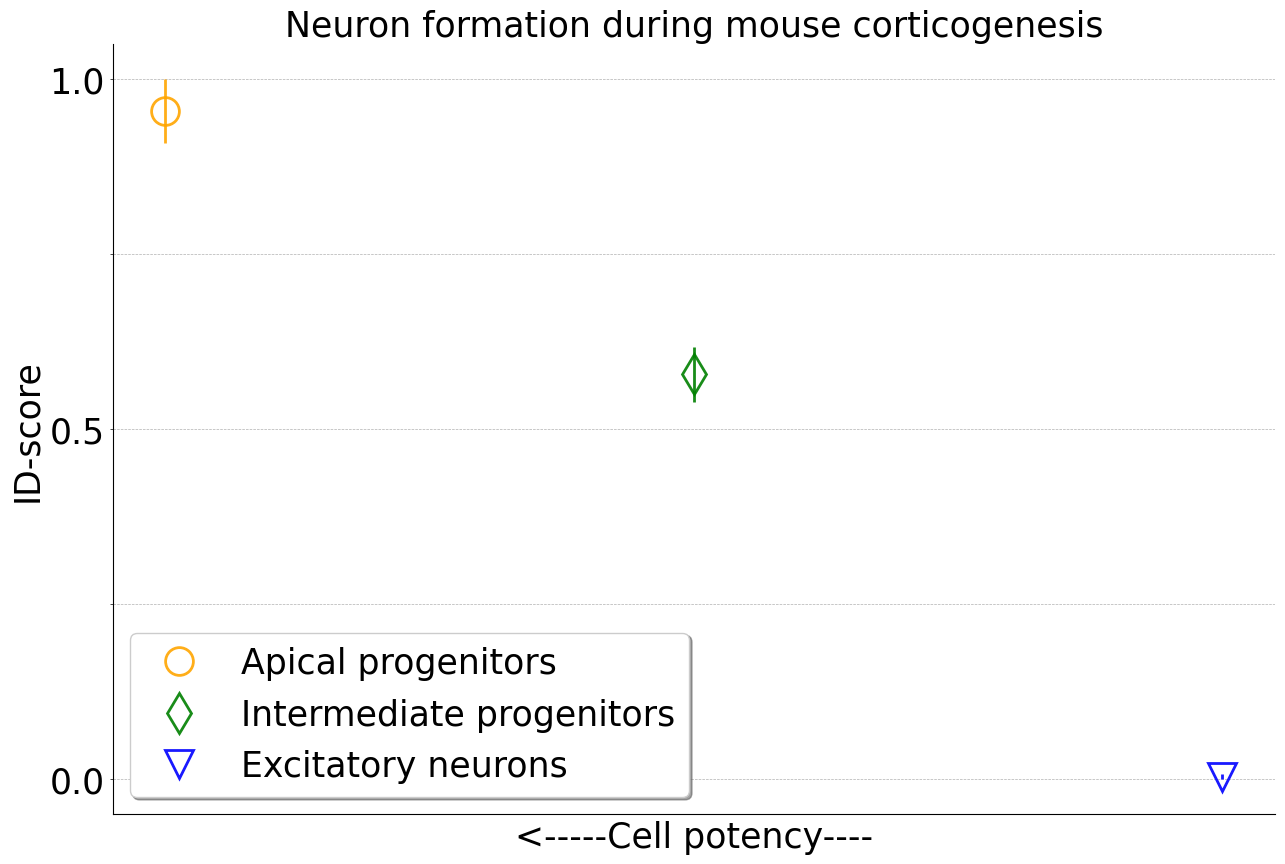

In [16]:
x = results_dict['Mean trend']['Labels']
y = results_dict['Mean trend']['Mean']
y_err = results_dict['Mean trend']['Std']

plot_params = {"label_size": 25, "markersize": 20,
                "linewidth": 4, "linestyle": ' ',
                "alpha": 0.9, "markeredgewidth": 2,
                "ticks_length": 2, "ticks_width": 0.5,
                "f_legend": 1}

fig, ax = plt.subplots(figsize = (15, 10))


title = 'Neuron formation during mouse corticogenesis'
celltype1 = np.array(['Apical progenitors'])
x_val = np.arange(1, len(celltype1)+1)
label = 'Apical progenitors'
plot_params['marker'] = 'o'
plot_params['color'] = 'orange'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype1, dataset_name, 
                                title = title, 
                                plot_params = plot_params)

lineage_shift = 5

celltype2 = np.array(['Intermediate progenitors'])
x_val = np.arange(1, len(celltype2)+1)+lineage_shift
label = 'Intermediate progenitors'
plot_params['marker'] = 'd'
plot_params['color'] = 'green'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype2, dataset_name, 
                                title = title, 
                                plot_params = plot_params)

celltype3 = np.array(['Excitatory neurons'])
x_val = np.arange(1, len(celltype3)+1)+2*lineage_shift
label = 'Excitatory neurons'
plot_params['marker'] = 'v'
plot_params['color'] = 'blue'
Plot_figures.plot_lineage_trend(ax, x_val, x, y, y_err, label, 
                                celltype3, dataset_name,
                                title = title, 
                                plot_params = plot_params)